In [1]:
#karas install
!pip install keras

In [2]:
# tf install
!pip install tensorflow

                                              0.0/272.8 MB ? eta -:--:--
                                             1.2/272.8 MB 24.8 MB/s eta 0:00:11
                                             5.6/272.8 MB 59.2 MB/s eta 0:00:05
     -                                       9.4/272.8 MB 66.9 MB/s eta 0:00:04
     -                                      12.8/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     15.7/272.8 MB 26.2 MB/s eta 0:00:10
     --                                     17.

In [4]:
# MNIST data load
from keras.datasets import mnist
X, y = mnist.load_data()[0]
X.shape, y.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [15]:
import pickle as pkl
data = mnist.load_data()
with open(r'./data/mnist.pkl', 'wb') as f:
    pkl.dump(data, f)

In [31]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.166666, random_state=1473032201)
X_tmp.shape, X_test.shape, y_tmp.shape, y_test.shape

((50000, 28, 28), (10000, 28, 28), (50000,), (10000,))

In [5]:
(X_tmp, y_tmp),(X_test, y_test) = mnist.load_data()

In [6]:
X_tmp.shape, y_tmp.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

(-0.5, 27.5, 27.5, -0.5)

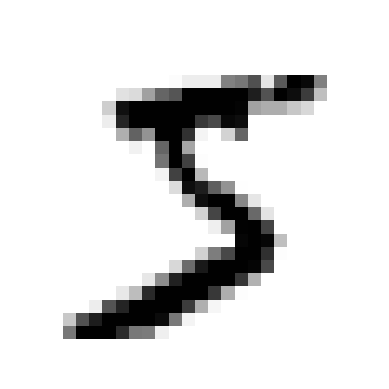

In [41]:
# 데이터 시각화
import matplotlib.pyplot as plt
plt.imshow(X_tmp[0].reshape(28,28), cmap='binary')
plt.axis('off')

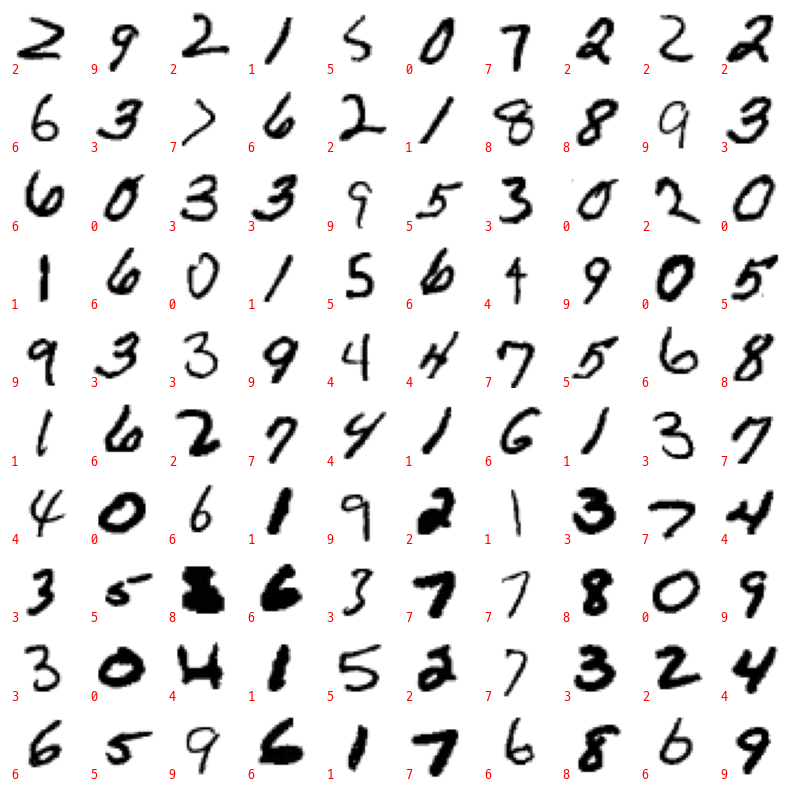

In [63]:
# 데이터 10*10개 시각화
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(10,10))
start_n = 5900
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(X_tmp[start_n+i*10+j].reshape(28,28), cmap='binary')
        axes[i,j].axis('off')
        # 정답값 출력
        axes[i,j].text(0, 27, y_tmp[start_n+i*10+j], color='r', fontsize=10)

In [52]:
import numpy as np
np.unique(y_tmp, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [8]:
# 28*28 -> 784
X_tmp = X_tmp.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_tmp.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
# 0~255 -> 0~1 : 정규화
X_tmp = X_tmp.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [56]:
# stratified k-fold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1473032201)
skf.get_n_splits(X_tmp, y_tmp)

5

In [61]:
# tree clf 모델 생성
# accuracy 스코어 출력
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
scores = []
max_d_range = range(10, 21)
for depth in max_d_range:
    depth_scores = []
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1473032201)
    for train_index, test_index in skf.split(X_tmp, y_tmp):
        X_train, X_valid = X_tmp[train_index], X_tmp[test_index]
        y_train, y_valid = y_tmp[train_index], y_tmp[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        score = accuracy_score(y_valid, y_pred)
        depth_scores.append(score)
    mean_score = np.mean(depth_scores)
    scores.append((mean_score, depth))

In [62]:
scores.sort(key=lambda x: x[0], reverse=True)
scores

[(0.86995, 18),
 (0.8695999999999999, 14),
 (0.8692333333333334, 15),
 (0.8692333333333332, 19),
 (0.8692, 20),
 (0.8688666666666667, 16),
 (0.8684666666666667, 13),
 (0.8682000000000001, 17),
 (0.8674666666666667, 12),
 (0.8607333333333334, 11),
 (0.8523833333333334, 10)]

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth=18, random_state=1473032201)
clf.fit(X_tmp, y_tmp)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8789

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 923,    0,    7,    5,    4,    7,   11,    5,   10,    8],
       [   0, 1091,    7,    3,    3,    7,   11,    3,    8,    2],
       [   9,   10,  885,   29,   14,   14,   15,   26,   23,    7],
       [   9,    4,   28,  864,    8,   47,    4,    8,   23,   15],
       [   8,    5,   10,    7,  861,    5,   16,    8,   21,   41],
       [  15,    5,    4,   43,    6,  750,   20,    5,   24,   20],
       [  19,    7,   14,    6,   21,   25,  834,    1,   25,    6],
       [   4,   12,   21,   17,    9,    4,    2,  933,   10,   16],
       [  12,    9,   29,   37,   26,   22,   16,   11,  782,   30],
       [  17,    3,   11,   21,   37,   11,    5,   19,   19,  866]],
      dtype=int64)

<Axes: >

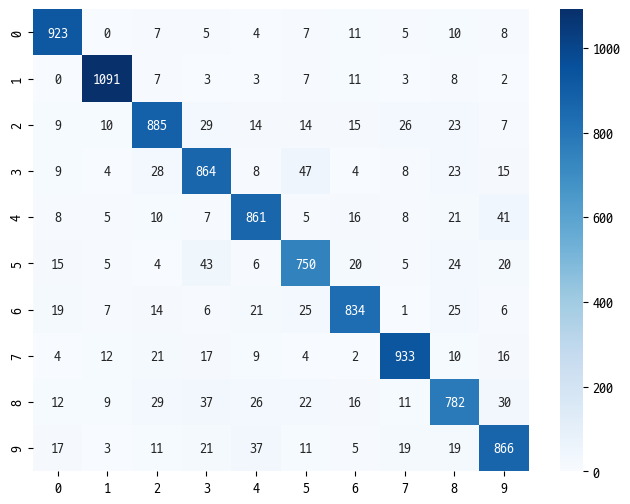

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [93]:
def confusion_matrix_heatmap(y_true, y_pred, logscale=False, cmap='Blues', figsize=(8,6),showlog=True):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    cm = confusion_matrix(y_true, y_pred)
    fmt = 'd'
    title = '혼동 행렬'
    labels = True
    if logscale:
        fmt = ''
        cm = np.log1p(cm)
        cm_x_len  = cm.shape[0]
        cm_y_len  = cm.shape[1]
        if showlog:
            title = '로그 스케일 - ' + title
            counts = [f'{value:d}' for value in confusion_matrix(y_true, y_pred).flatten()]
            f_counts = [f'{value:.2f}' for value in cm.flatten()]
            labels = [f'{c}\n{f}' for c, f in zip(counts, f_counts)]
            labels = np.asarray(labels).reshape(cm_x_len, cm_y_len)
        else:
            labels = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt=fmt, cmap=cmap)
    plt.title(title)
    plt.xlabel('예측값')
    plt.ylabel('실제값')
    # 구석에 '*색상은 로그 스케일 적용' 표시
    if logscale and not showlog:
        plt.text(0.8, -0.08, '*색상은 로그 스케일 적용', ha='left', va='center', transform=plt.gca().transAxes)

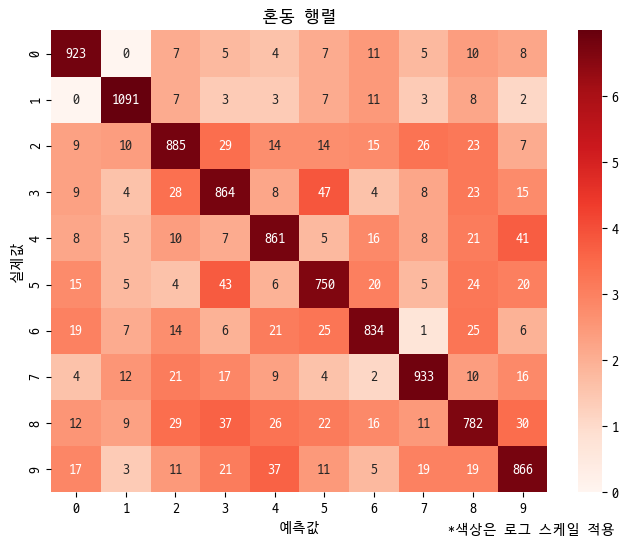

In [94]:
confusion_matrix_heatmap(y_test, y_pred, logscale=True, cmap='Reds', showlog=False)

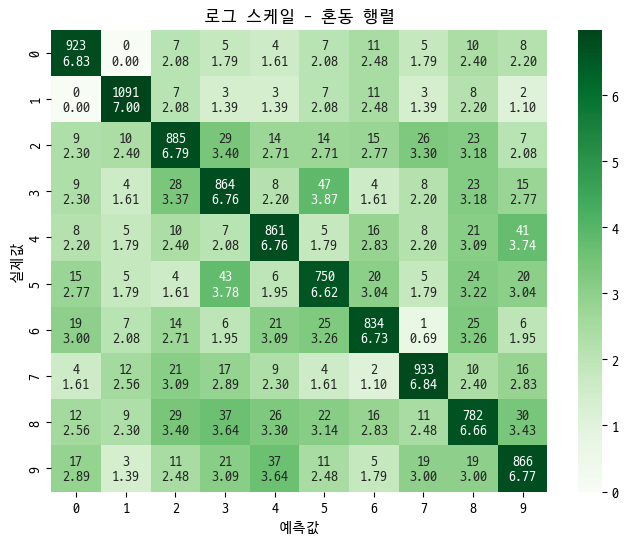

In [97]:
confusion_matrix_heatmap(y_test, y_pred, logscale=True, cmap='Greens', showlog=True)

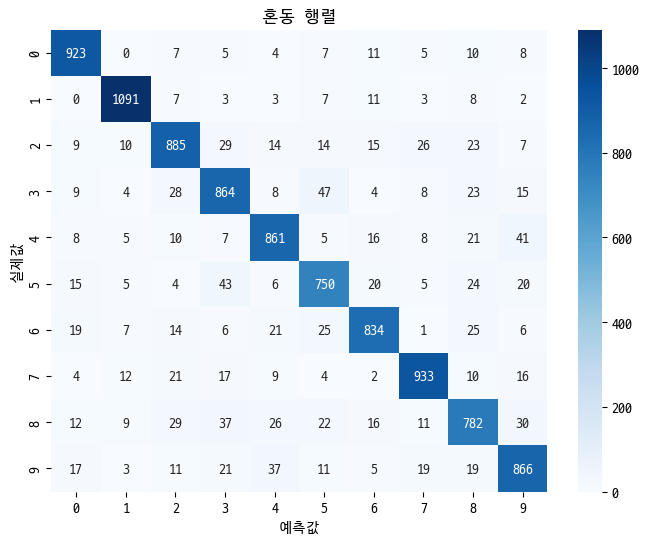

In [58]:
confusion_matrix_heatmap(y_test, y_pred)

In [115]:
# digit.png 파일을 읽어서 28*28 np.array로 변환
from PIL import Image
import numpy as np
img = Image.open(r'./data/digit.png')
img = img.convert('L')
img = img.resize((28,28))
img = np.array(img)

# img를 0~1 사이의 값으로 정규화
img = img.astype('float32') / 255

# 추론
clf.predict(img.reshape(1, 784))

array([0], dtype=uint8)

array([7], dtype=uint8)

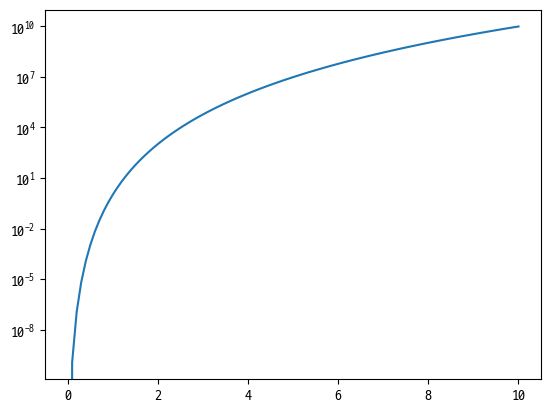

In [9]:
# y = x^2 을 y축 로그스케일로 그리기
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
y = x**10
plt.plot(x, y)
plt.yscale('log')